In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 문제 정의

FIFA 19의 선수 스텟을 바탕으로, 그 선수의 포지션을 예측하라

# 데이터 수집 및 전처리

In [2]:
# 데이터를 수집합니다
df = pd.read_csv("../data/fifa_data.csv")

In [3]:
# 수집된 데이터 샘플을 확인합니다
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df1 = pd.DataFrame({'Name': df.Name,'Club':df.Club,'Position':df.Position,}) #선수정보데이터
df2 = df.iloc[:,54:88].astype(float) #스텟데이터

td = pd.concat([df1,df2],axis=1)
td.head()

,Name,Club,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,FC Barcelona,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,Juventus,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,Paris Saint-Germain,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,Manchester United,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,Manchester City,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [5]:
# 현재 가지고 있는 데이터에서, 포지션의 갯수를 확인한다
td.Position.value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

* 비슷한 역할을 하는 포지션끼리는 합쳐서 포지션별 데이터의 수를 늘린다.

In [6]:
td.loc[td['Position']=='LF', ['Position']] = 'ST'
td.loc[td['Position']=='RF', ['Position']] = 'ST'
td.loc[td['Position']=='CF', ['Position']] = 'ST'
td.loc[td['Position']=='LS', ['Position']] = 'ST'
td.loc[td['Position']=='RS', ['Position']] = 'ST'
td.loc[td['Position']=='LAM', ['Position']] = 'CAM'
td.loc[td['Position']=='RAM', ['Position']] = 'CAM'
td.loc[td['Position']=='LCM', ['Position']] = 'CM'
td.loc[td['Position']=='RCM', ['Position']] = 'CM'
td.loc[td['Position']=='RDM', ['Position']] = 'CDM'
td.loc[td['Position']=='LDM', ['Position']] = 'CDM'
td.loc[td['Position']=='LW', ['Position']] = 'WF'
td.loc[td['Position']=='RW', ['Position']] = 'WF'
td.loc[td['Position']=='LB', ['Position']] = 'WB'
td.loc[td['Position']=='RB', ['Position']] = 'WB'
td.loc[td['Position']=='LWB', ['Position']] = 'WB'
td.loc[td['Position']=='RWB', ['Position']] = 'WB'
td.loc[td['Position']=='LM', ['Position']] = 'WM'
td.loc[td['Position']=='RM', ['Position']] = 'WM'
td.loc[td['Position']=='LCB', ['Position']] = 'CB'
td.loc[td['Position']=='RCB', ['Position']] = 'CB'

In [7]:
# 현재 가지고 있는 데이터에서, 포지션의 갯수를 확인한다
td.Position.value_counts()

CB     3088
WB     2778
ST     2667
WM     2219
CM     2180
GK     2025
CDM    1439
CAM    1000
WF      751
Name: Position, dtype: int64

In [8]:
td = td.dropna() #null값 제거

# 데이터 나누기 (학습 데이터, 테스트 데이터)

In [9]:
# sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있다
from sklearn.model_selection import train_test_split

# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다
train, test = train_test_split(td, test_size=0.2)

In [10]:
# 학습 데이터의 갯수를 확인합니다, 14565개의 데이터가 있습니다.
train.shape[0]

14334

In [11]:
# 테스트 데이터의 갯수를 확인합니다. 3642개의 데이터가 있습니다.
test.shape[0]

3584

# 다듬어진 데이터를 파일로 저장하기
다듬어진 데이터를 파일로 저장하여, 머신러닝 분류 알고리즘 실습 시에 사용하도록 하겠습니다.

In [12]:
with open('../data/fifa_train.pkl', 'wb') as train_data:
    pickle.dump(train, train_data)
    
with open('../data/fifa_test.pkl', 'wb') as test_data:
    pickle.dump(test, test_data)

# 데이터 불러오기 (학습 데이터, 테스트 데이터)
학습 데이터 및 테스트 데이터를 로드합니다.

In [13]:
with open('../data/fifa_train.pkl', 'rb') as train_data:
    train = pickle.load(train_data)
    
with open('../data/fifa_test.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

# 모델 학습
## 1. K-NN(최적의 k 찾기 (교차 검증 - cross validation))

In [14]:
# import kNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# find best k, range from 3 to half of the number of data
max_k_range = train.shape[0] // 2
k_list = []
for i in range(7, max_k_range, 179):
    k_list.append(i)

cross_validation_scores = []
x_train = train.iloc[:,3:37]
y_train = train[['Position']]

# 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

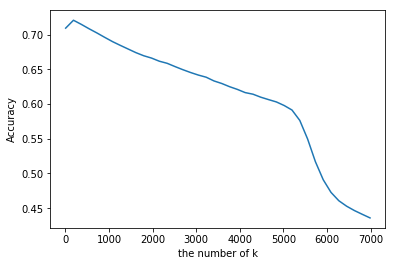

In [15]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [16]:
# find best k
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k : " + str(k) )

The best number of k : 186


* 범위를 좁혀서 다시시도한다.

In [17]:
# find best k, range from 3 to half of the number of data
k_list = []
for i in range(7, 367, 9):
    k_list.append(i)

cross_validation_scores2 = []
x_train = train.iloc[:,3:37]
y_train = train[['Position']]

# 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores2.append(scores.mean())

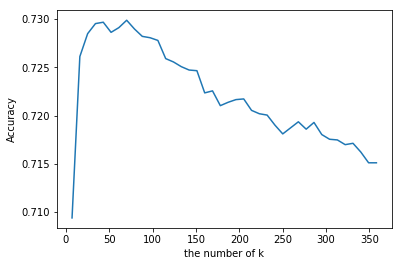

In [18]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores2)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [19]:
# find best k
cvs2 = cross_validation_scores2
k = k_list[cvs2.index(max(cross_validation_scores2))]
print("The best number of k : " + str(k) )

The best number of k : 70


In [20]:
# find best k, range from 3 to half of the number of data
k_list = []
for i in range(52, 70):
    k_list.append(i)

cross_validation_scores3 = []
x_train = train.iloc[:,3:37]
y_train = train[['Position']]

# 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores3.append(scores.mean())

cross_validation_scores3

[0.7286280984445184,
 0.7279296251705396,
 0.729185880015433,
 0.7285598216510614,
 0.7293967911935456,
 0.7286999250552733,
 0.7291181452660249,
 0.7293266185596965,
 0.7292575189649224,
 0.7291166372250322,
 0.7294663819900764,
 0.7291866661223636,
 0.7296743740823417,
 0.7292550861211202,
 0.7297434769976687,
 0.7284887279487304,
 0.7296047849346424,
 0.7295331042467211]

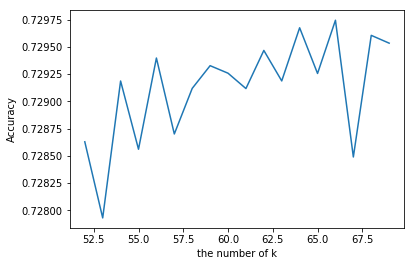

In [21]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores3)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [22]:
# find best k
cvs3 = cross_validation_scores3
k = k_list[cvs3.index(max(cross_validation_scores3))]
print("The best number of k : " + str(k) )

The best number of k : 66


* 최적의 k는 60이다.

## 2. SVM 최적의 파라미터 찾기
SVM의 파라미터는 두가지가 있습니다.
1. C : 비용 (cost), 결정경계선의 마진을 결정하는 파라미터입니다.
2. gamma: 커널의 데이터포인트의 표준편차를 결정하는 파라미터입니다.

결과적으로 C가 클수록, 결정경계선과 서포트 벡터의 간격(마진)이 작아집니다.  
결과적으로 gamma가 클수록, 결정경계선이 데이터포인트와 더욱 가까워집니다.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import numpy as np

sklearn에서 제공하는 gridsearch를 사용하시면, 손쉽게 최적의 C, gamma를 구하실 수 있습니다.

In [ ]:
def svc_param_selection(X, y, nfolds):
    svm_parameters = [
                        {'kernel': ['rbf'],
                         'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1],
                         'C': [0.01, 0.1, 1, 10, 100, 1000]
                        }
                       ]
    
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(X_train, y_train.values.ravel())
    print(clf.best_params_)
    
    return clf

In [ ]:
X_train = train.iloc[:,3:24]
y_train = train[['Position']]
# 최적의 파라미터를 sklearn의 gridsearch를 통해 구합니다.
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

In [ ]:
clf

# 모델 테스트
## 1. K-NN

In [23]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# select data features
x_train = train.iloc[:,3:37]
# select target value
y_train = train[['Position']]

# setup knn using train data
knn.fit(x_train, y_train.values.ravel())

# select data feature to be used for prediction
x_test = test.iloc[:,3:37]

# select target value
y_test = test[['Position']]

# test
pred = knn.predict(x_test)

In [24]:
# check ground_truth with knn prediction
comparison = pd.DataFrame(
    {'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison.head()

,prediction,ground_truth
0,WB,WB
1,WB,WB
2,ST,ST
3,WB,WB
4,CDM,CM


In [25]:
# check accuracy
print("accuracy : "+ 
          str(accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.7276785714285714


## 2. SVM
sklearn의 gridsearch로 얻어진 최적의 파라미터로 학습된 clf를 이용하여,  
테스트를 진행합니다.

In [ ]:
# 테스트에 사용될 특징을 지정합니다
X_test = test.iloc[:,3:24]

# 특징으로 예측할 값 (포지션)을 지정합니다
y_test = test[['Position']]

# 최적의 파라미터로 완성된 SVM에 테스트 데이터를 주입하여, 실제값과 예측값을 얻습니다.
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))
print()
print("accuracy : "+ str(accuracy_score(y_true, y_pred)) )

In [ ]:
# 실제값(ground truth)과 예측값(prediction)이 어느 정도 일치하는 눈으로 직접 비교해봅니다
comparison = pd.DataFrame({'prediction':y_pred, 'ground_truth':y_true.values.ravel()}) 
comparison.head()

# 결론

* WB, ST, GK, CB의 예측률이 매우 높게 나왔고 미드필더의 세부예측률이 낮게 나왔다.


* WF는 아예 예측을 못한것으로 보아 해당 방법에 문제점이 존재한다고 알 수 있다.


* 전체적인 정확도는 약 76%로 k-NN알고리즘보다 약간 높은 정도로 나왔다. 분류에 필요없는 column을 제거한 것과 svm의 더 높은 예측력이 이유인것 같다.